In [88]:
import pandas as pd
from gensim.models import ldamodel
from gensim.corpora import Dictionary
from Preprocess import get_preprocessed_dataset
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

In [89]:
path_to_data = '/home/a.yasinetski/PycharmProjects/Study/Academy/TextClassification/data/raw_data/full.csv'
# dataset = get_preprocessed_dataset(path_to_data)
dataset = pd.read_csv('/home/a.yasinetski/PycharmProjects/Study/Academy/TextClassification/data/preprocessed_data/preprocessed.csv')

In [90]:
label_splitted = []
for i in range(5):
    label_splitted.append(dataset[dataset['label'] == i]['text'])
label_splitted[1].head()

1438    niro film lead box office film star robert nir...
1439    musical treatment capra film classic film wond...
1440    singer ian brown gig arrest former stone rose ...
1441    jackson film absolute disaster expert told mic...
1442    arnold congratulated oscar win oscarwinner and...
Name: text, dtype: object

In [91]:
def get_topics(data, num_topics):
    texts = [data.iloc[i].split() for i in range(len(data))]
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    LDA = ldamodel.LdaModel
    lda_model = LDA(corpus=corpus, id2word=dictionary, num_topics=num_topics, chunksize=1000, passes=50, iterations=100)
    return lda_model.print_topics()

In [92]:
def Vizualize(topics):
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    cloud = WordCloud(background_color='white', width=2500, height=1800, max_words=10, colormap='tab10', color_func=lambda *args, **kwargs: cols[i], prefer_horizontal=1.0)

    fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict((x.strip(), float(y.strip())) for y, x in (element.split('*')  for element in topics[i][1].split(' + ')))
        cloud.generate_from_frequencies(topic_words)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

In [93]:
data_topics = [get_topics(data, num_topics=4) for data in label_splitted]

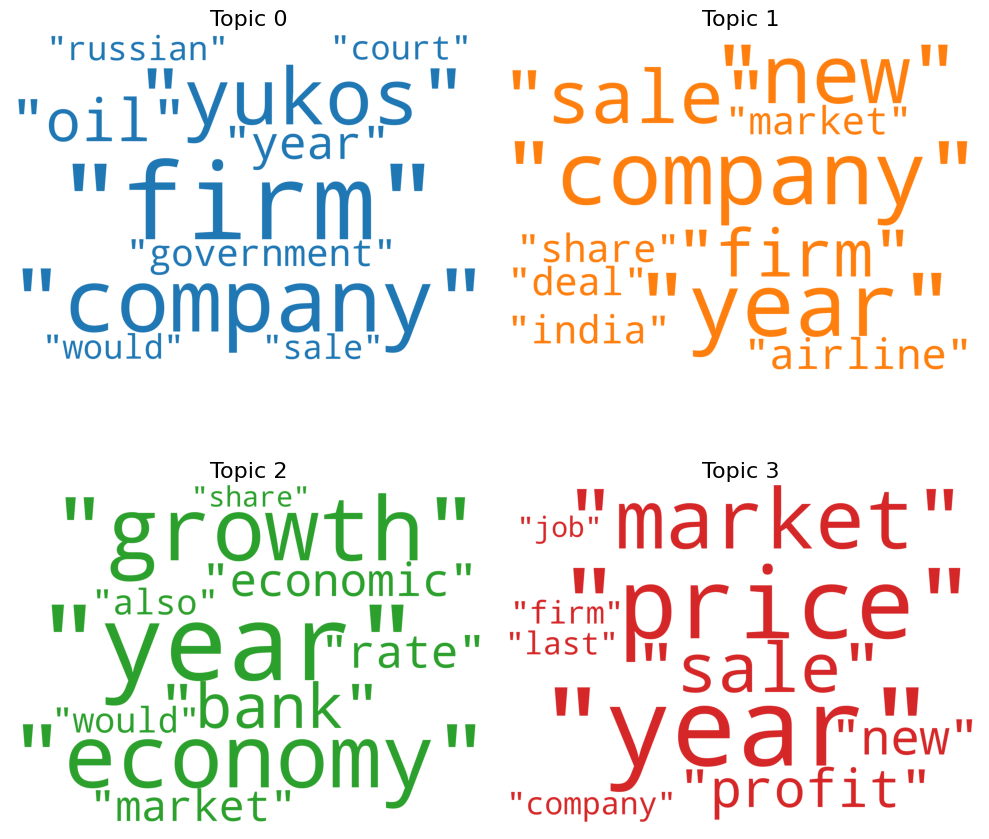

In [94]:
Vizualize(data_topics[0])

Новости первого класса относятся к бизнесу. Можно отдельно выделить тему связанную с российской Юкос, остальные темы сильно пересекаются.

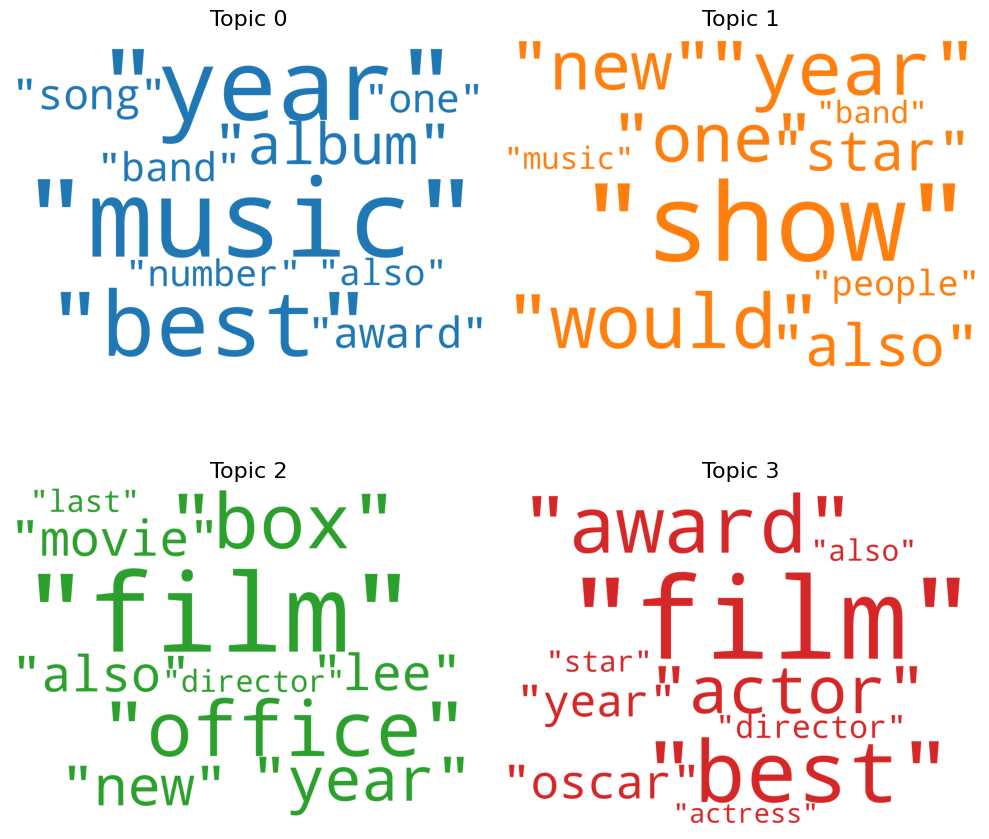

In [95]:
Vizualize(data_topics[1])

Новости второго класса относятся к сфере развлечений. Хорошо прослеживаются темы связанные с музыкой и музыкальными группами, а также темы связанные с кино.

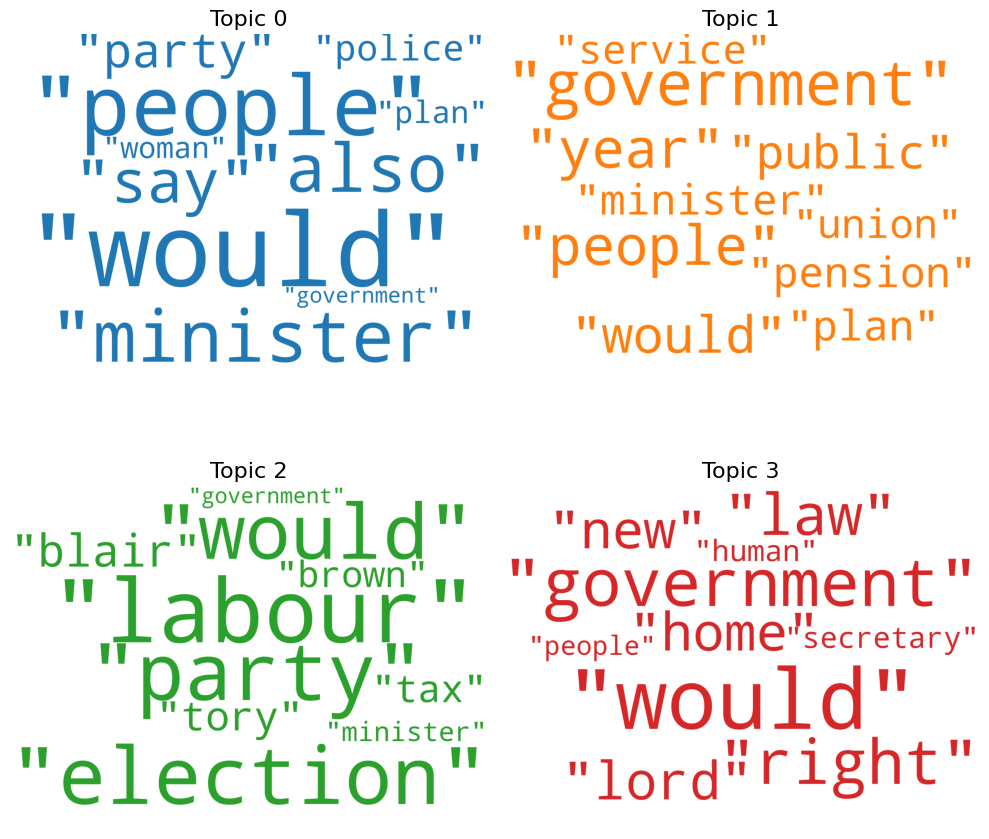

In [96]:
Vizualize(data_topics[2])

Новости третьего класса относятся к политике. Темы сильно пересекаются, но можно выделить тему связанную с выборами, а также связанную с принятием новых законов.

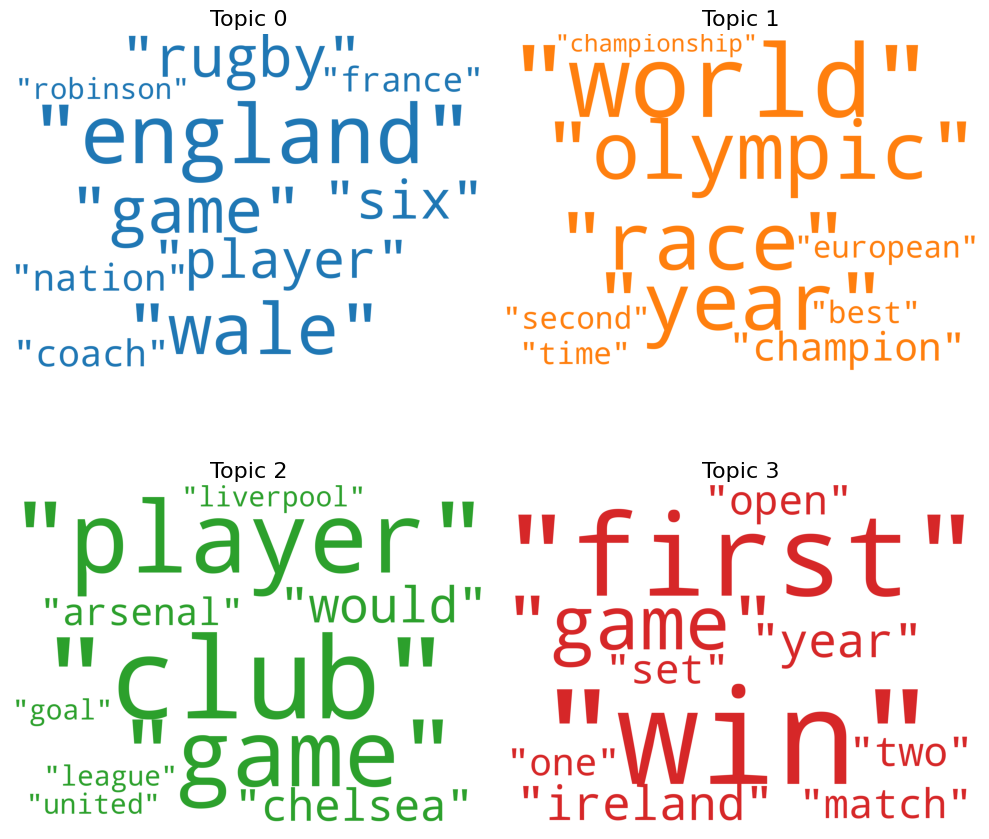

In [97]:
Vizualize(data_topics[3])

Новости четвертого класса относятся к спорту. Хорошо прослеживаются различные темы: регби, футбол, олимпийские игры.

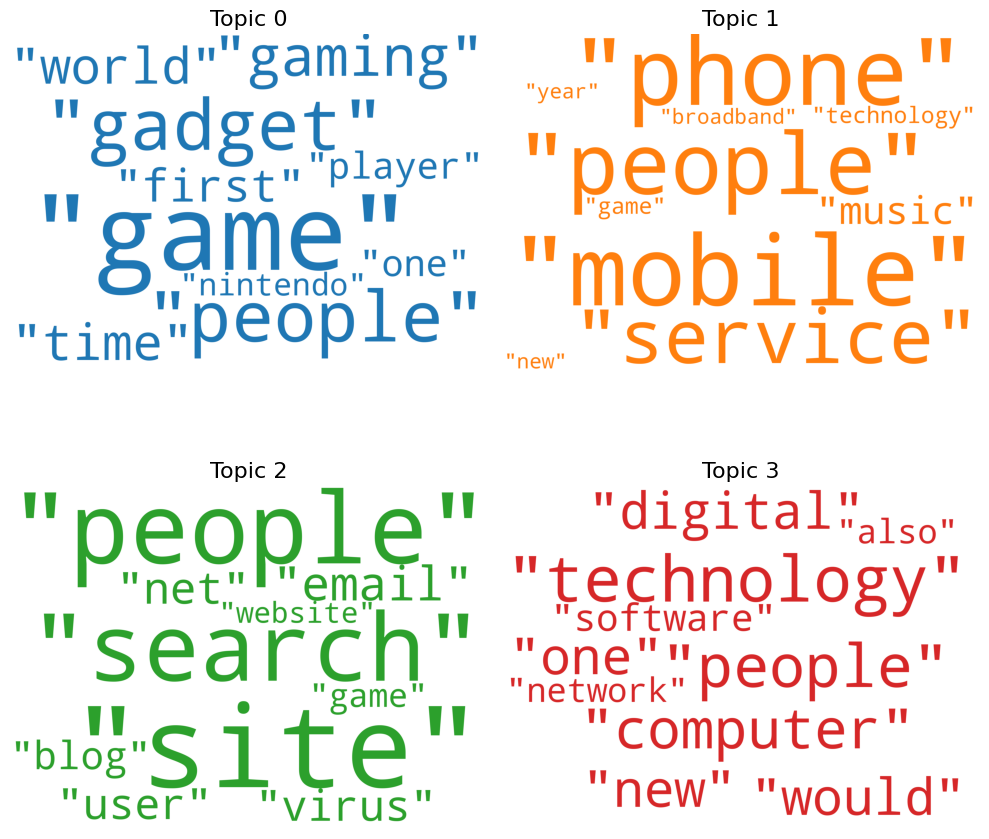

In [98]:
Vizualize(data_topics[4])

Новости пятого класса относятся к теме технологий. Хорошо выделились следующие темы: игровая индустрия, программное обеспечение, веб-сервисы, сервисы для мобильных телефонов.